In [29]:
import cv2
image = cv2.imread('./images/cat.jpg')

print(image.shape)  #height, width, channel
print(image.size)

(380, 441, 3)
502740


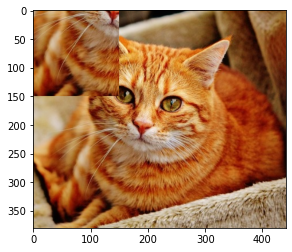

In [31]:
roi = image[200:350,50:200]
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# ROI(Region Of Interest)의 이미지 평균값으로 이미지 나타내기
나눌 블록의 크기를 w * h로 설정하고 x, y는 왼쪽 상단부터의 좌표를 나타낸다.

roi = src[y:y + h, x:x + w]는 원본 영상의 ROI를 계산해 그 평균값을 계산한다.

평균값을 타나내는 것으로 N의 값이 커질수록 원본 영상과 비슷해지고 N이 작을수록 원본 영상의 전체 평균 값과 비슷해져 구분하기 어려워진다.

In [33]:
import cv2
import numpy as np

src = cv2.imread('./images/cat.jpg')
dst = np.zeros(src.shape,dtype = src.dtype)

In [37]:
N = 256
height,width,_ = src.shape

print(height,width)
h = height // N
w = width// N

for i in range(height):
    for j in range(width):
        y = j*h
        x = j*w
        roi = src[y:y+h, x:x+w]
        dst[y:y + h, x:x + w] = cv2.mean(roi)[0:3]
        
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

380 441


-1

In [9]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./images/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3) # 블록의 크기, 사용할 경계값ㅁ

In [40]:
# 마우스로 ROI영역 나타내기

import cv2
import numpy as np 
import matplotlib.pyplot as plt

src = cv2.imread('./images/cat.jpg')
roi = cv2.selectROI(src)  # 여기서 이미 다이얼로그창이 뜸.

print('roi = ', roi)
print(roi[1], roi[3], roi[0],roi[2])

img = src[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

roi =  (156, 151, 230, 159)
151 159 156 230


-1

# 마우스로 다중 ROI 영역 나타내기

cv2.selectROIs(src,src,false,true)  
src라는 생성된 이미지에 격자 표시 않함(False)  
마우스 클릭 위치에서 드래그하여 박스 선태(true) 


In [46]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

src = cv2.imread('./images/cat.jpg')
rects = cv2.selectROIs('src', src, False, True)

print('rects: ', rects)

for r in rects:
    # 시작점 종료점, color
    cv2.rectangle(src, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), 255)
    
cv2.imshow('src', src) 
cv2.waitKey() 
cv2.destroyAllWindows()
cv2.waitKey(1) 

rects: ()


-1

# 이미지 합치기

cv2.add() Saturation 연산을 수행
0보다 작으면 0, 255보다 크면 255 로 표현

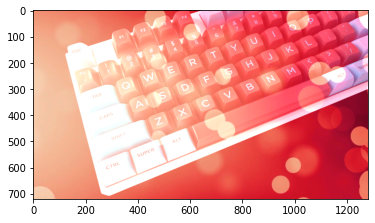

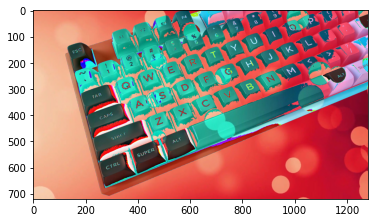

In [49]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread('./images/image_1.jpg')
image_2 = cv2.imread('./images/image_2.png')


result = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

result = image_1 + image_2
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()



# 임계점 처리하기

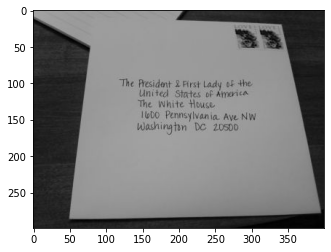

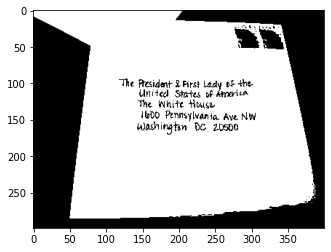

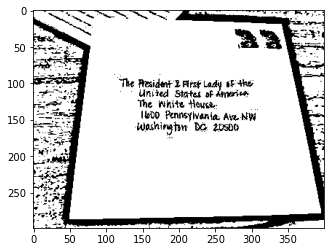

In [14]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

20.0 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


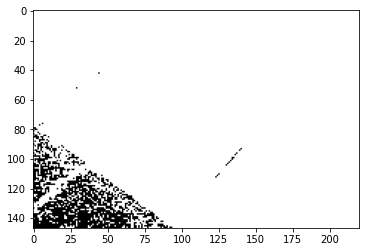

In [27]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
images = []

ret,thres1 = cv2.threshold(image,20,255,cv2.THRESH_BINARY)
print(ret,thres1)
images.append(thres1)
for i in images:
    plt.imshow(cv2.cvtColor(i,cv2.COLOR_GRAY2RGB))
    plt.show()